# **Le classique "chien ou chat" - CNN avec Keras**

Le but de cet exercice est la classification d'images d'animaux en chien ou en chat. Évidemment ça peut paraître assez stérile comme objectif dans la vraie vie mais sachez que les applications intéressantes et utiles de ces réseaux sont multiples notamment en médecine.  
Par exemple pour la reconnaissance de tumeur pulmonaire ou autre.  
Et ce qui est chouette, c'est que la seule différence sera dans les images pour l'entraînement et la strutucre du réseau éventuellement.

## **Les données**

Les données ne sont plus structurées en un seul et joli CSV à partir duquel on peut associer le label et les variables explicatives facilement pour chaque observation. Le problème est qu'il faut pouvoir associer à chaque image le bon label.

Une idée simple de solution est de structurer les données dans des dossiers (sous-dossiers) contenant les labels dans les noms par exemple :
1. séparer les échantillons d'entraînement et de test dans 2 dossiers différents
2. ensuite on appelle chaque image par un nom {label}_{numéro} genre chat_1, chat_2, chien_1, chien_2 etc...
3. pour finir on fait un petit script qui récupère le label dans le nom de l'image à chaque fois via une petite manip de string

On pourrait faire ça, ça marche, mais il y a une manière "toute cousue" qui fonctionne très bien dans Keras puisqu'on on y trouve des outils pour extraire les images facilement. La seule contrainte est de bien structurer le dossier de la manière suivante :

<img src="images/cnn_exo_arborescence.png">

**Question 1 :** le dossier dataset n'est pour l'instant pas organisé comme il devrait...à vous de le faire, comme vous voulez à la main, depuis le terminal, c'est vous qui choisissez mais vous devez obtenir la même arborescence que celle indiquée dans la photo ci-dessus ! Faire un screenshot (avec un élément qui vous identifie, ici c'est mon username) et l'afficher en réponse à cette question  
*ps1 :* le training_set contient toutes les images numérotées de 1 à 4000 et le test_set contient toutes celles de 4001 à 5000. Vous devez respecter cette répartition pour qu'on ait les mêmes échantillons.  
*ps2 :* le dossier single_prediction est pour la fin de l'exercice, il n'est pas nécessaire dans l'arborescence des dossiers d'image pour `Keras` mais créez-le de suite, ce sera fait.

<img src="ScreenshotTree.png">

## **Le réseau CNN**

Tout est dit. Ou presque.  
Vous devez construire et entraîner un réseau de neurones à convolution pour la catégorisation des images en chien/chat.  
Allez, je vous mets quelques pistes et même toutes les librairies nécessaires, c'est cadeau.

In [3]:
#Librairies
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf

#### **L'architecture**

Dans un premier temps construisez votre réseau étape par étape

In [4]:
img_width = 150
img_height = 150
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
  
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

#### **L'entraînement**

Là, c'est un peu plus complexe alors je vous donne les méthodes à utiliser, dans cet ordre :
1. `ImageDataGenerator`

2. `flow_from_generator`
@Développeuse pour l'entraînement je vous parle de flow_from_generator qui n'existe pas, c'est flow_from_directory
3. `fit_generator`

Il va certainement vous falloir fouiller un peu là-dedans https://keras.io/api/preprocessing/image/ et en profiter pour découvrir le concept merveilleux de *Data Augmentation*.

In [16]:
# we need to convert the RGB images into array of numbers
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [17]:
TRAINING_DIR = "./dataset/training_set/"
VALIDATION_DIR = "./dataset/test_set/"

In [22]:
#Prepare generators for training and validation sets
batch_size = 32
training_data = data_generator.flow_from_directory(directory = TRAINING_DIR,
                                                   target_size = (150, 150),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = VALIDATION_DIR,
                                                  target_size = (150, 150),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
history = model.fit(training_data, epochs=25,  validation_data = testing_data, verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/25
250/250 [==============================] - 133s 530ms/step - loss: 0.6856 - accuracy: 0.5505 - val_loss: 0.6459 - val_accuracy: 0.6375
Epoch 2/25
250/250 [==============================] - 136s 545ms/step - loss: 0.6340 - accuracy: 0.6421 - val_loss: 0.5891 - val_accuracy: 0.7080
Epoch 3/25
250/250 [==============================] - 138s 551ms/step - loss: 0.5886 - accuracy: 0.6886 - val_loss: 0.5607 - val_accuracy: 0.7055
Epoch 4/25
250/250 [==============================] - 138s 552ms/step - loss: 0.5643 - accuracy: 0.7121 - val_loss: 0.5313 - val_accuracy: 0.7460
Epoch 5/25
250/250 [==============================] - 139s 554ms/step - loss: 0.5273 - accuracy: 0.7384 - val_loss: 0.4926 - val_accuracy: 0.7730
Epoch 6/25
250/250 [==============================] - 139s 557ms/step - loss: 0.5062 - accuracy: 0.7501 - val_loss: 0.4940 - val_accuracy: 0.7670
Epoch 7/25
250/250 [===========

In [40]:
model.save("dog_or_cat_v0.h5")

In [44]:

# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("dog_or_cat_v0.h5")

In [45]:
!ls dog_or_cat_v0.h5

dog_or_cat_v0.h5


In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

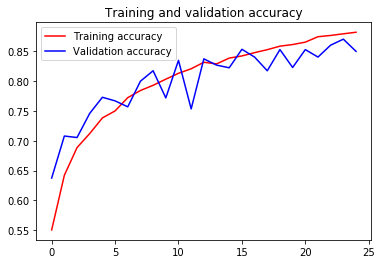

<Figure size 432x288 with 0 Axes>

In [25]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## **Prédictions à partir de nouvelles images**

Prenez une jolie photo de votre chien ou de votre chat et utilisez votre modèle CNN pour prédire de quel animal il s'agit. Si vous n'avez ni chien ni chat, pas de panique, dans le dossier `single_prediction`, il y a ce qu'il faut et vous pouvez aussi tester d'autres images en allant en récupérer sur internet.

In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = reconstructed_model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction



In [66]:
PREDICTION_DIR = "./dataset/single_prediction/"

print(testing_image(PREDICTION_DIR + '/cat_or_dog_2.jpg'))



[[1.1338712e-29]]
Cat


In [70]:
print(testing_image(PREDICTION_DIR + '/cat_or_dog_1.jpg'))

[[1.]]
Dog


In [76]:
#test avec un image d'internet, c'est OK
print(testing_image(PREDICTION_DIR + '/images.jpeg'))

[[6.257167e-25]]
Cat


## **Amélioration de votre modèle**

Un petit *kaggle* maison : essayez d'améliorer l'accuracy de votre CNN
- Accuracy **entre 80% et 85%** sur le jeu de test, c'est **pas mal**
- Accuracy **entre 85% et 90%** sur le jeu de test, c'est **bien**
- Accuracy **supérieure à 90%**  sur le jeu de test, c'est **top**

Les règles du jeu :
- On garde bien sûr le même jeu d'entraînement
- Il est interdit de spécifier manuellement une seed

*Une indication utile :* laissez tomber la validation croisée dans un premier temps car en utilisant `fit_generator`, le modèle passe directement sur l'échantillon test pour valider le modèle. C'est faisable mais un peu plus compliqué...

In [56]:
from keras.layers import Dropout
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(rate = 0.3))
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(rate = 0.2))
model2.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(rate = 0.15))
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(rate = 0.15))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dropout(rate = 0.1))
model2.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#malhereusment c'est trop long. un plus cet model a tendance etre surentrainé
fitted_model = model2.fit(training_data,
                        steps_per_epoch = 1000,
                        epochs = 25,
                        validation_data = testing_data,
                        validation_steps = 1000)